In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(ggbeeswarm)
library(RColorBrewer)
library(stringr)
library(extrafont)
library(tidyr)
loadfonts(device = "pdf")
library(Biostrings)

In [3]:
theme_set(theme_classic() + 
          theme(axis.title.x = element_text(#hjust=-0.45, vjust = 7, 
                    size = rel(1)),
                axis.title.y = element_text(size = rel(1))
                , legend.position = "none",
                strip.background = element_blank(), strip.placement = "outside"
              ,strip.text.x = element_text(vjust = 2, size = rel(11/9))
              , axis.ticks.y = element_line(color = "black") 
                , axis.ticks.x = element_blank(), panel.spacing.x = unit(0, "null")
               ,plot.title = element_text(size = rel(1))
         ,axis.text.x = element_text(colour = "black", size = rel(11/9))
          ,axis.text.y = element_text(colour = "black", size = rel(11/9))
               ,text = element_text(family="ArialMT", size = 11)
          ,plot.margin = margin(0, 0, 0, 0, "in"),
              plot.background = element_rect(fill='transparent', color=NA),
              panel.background = element_rect(fill='transparent', color=NA),
              rect = element_rect(fill = "transparent")
         ))

In [4]:
summary_all <- read.delim("data/CRISPResso_summary.txt")
summary_all <- summary_all[, c("Batch", "Correct_edit", "Indels", "Reads_aligned_all_amplicons")]
summary_all <- gather(summary_all, key = "Edit_Type", value = "Percent", -Batch, -Reads_aligned_all_amplicons)
summary_all$rep <- gsub("_.*", "", summary_all$Batch)
summary_all$locus <-  gsub("_.*", "", gsub("REP[1-4]_", "", summary_all$Batch))
summary_all$insert <- gsub("_pegRNA.*", "", gsub(".*_BC", "BC", summary_all$Batch))
summary_all$color <- as.character(as.numeric(as.factor(summary_all$Edit_Type)))
summary_all$color <- factor(summary_all$color, levels= c('1','2'))
summary_all$Percent <- as.numeric(summary_all$Percent)
summary_all$Sequence <- gsub(".*_", "", summary_all$insert)
summary_all$Sequence <- unname(sapply(summary_all$Sequence
                                      , FUN = function(x) as.character(reverseComplement(DNAString(x)))))

In [5]:
plot_top20_barcodes <- function(summary_all, locus) {
    summary_all_plot <- summary_all[summary_all$locus == locus & !grepl("previous", summary_all$insert),]
    summary_all_plot_mean <- summary_all_plot[summary_all_plot$Edit_Type == "Correct_edit",] %>% 
        group_by(Sequence) %>% summarise(mean = mean(Percent))
    
    summary_all_plot$Sequence <- factor(summary_all_plot$Sequence
                                        , levels = summary_all_plot_mean$Sequence[order(summary_all_plot_mean$mean)])
    ggplot(summary_all_plot, aes(x = Sequence,y = Percent, fill = color)) + 
        geom_bar(stat = "summary", fun = "mean",position = position_dodge(width = 0.9)
                 , color = "black", size=0.25, width = 0.8) + 
        stat_summary(fun.data = "mean_sdl", fun.args = list(mult = 1), geom = "errorbar"
                     , position = position_dodge(width = 0.9), width = 0.4, size = 0.25) + 
        geom_beeswarm(dodge.width = 0.9, size = 1, cex = 1) + 
        xlab("Insertion") +
        scale_fill_manual(values = c(brewer.pal(n = 3, name = "Set1")[1], "lightgrey"),
                          labels = c("Correct Edit", "Indels"), name = "") +
        ylab("Total sequencing reads with\nspecified edit or indels (%)") + 
        theme( axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
        ggtitle(locus) +scale_x_discrete(expand=expansion(add=0.75)) +
        scale_y_continuous(breaks=seq(0,90,by = 10), limits=c(0, 90), expand = c(0, 0)) 
}

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


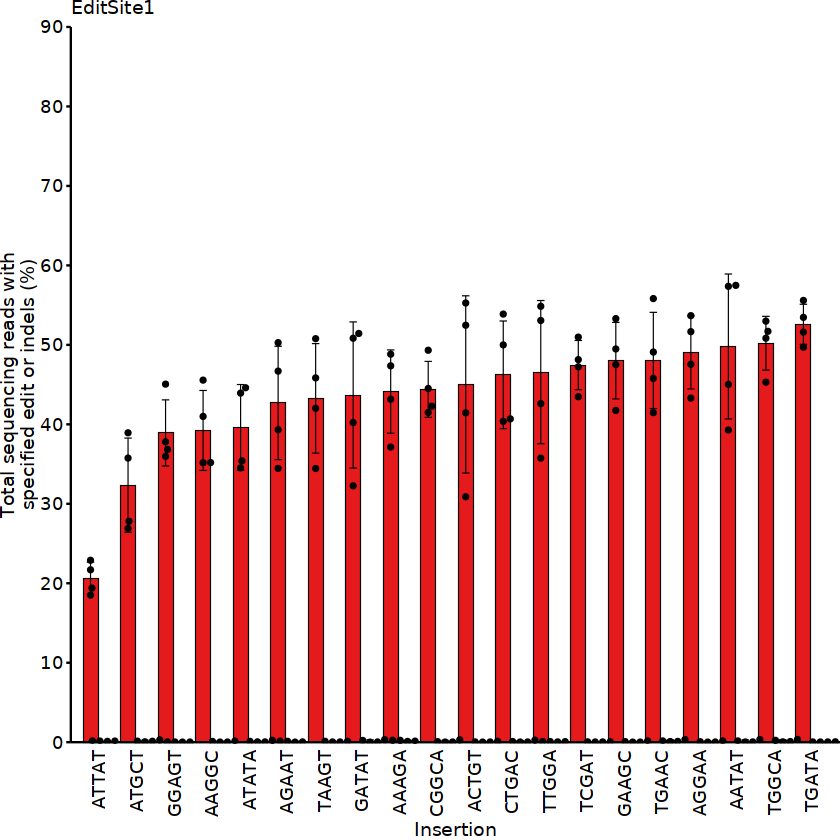

In [6]:
pdf("plots/EditSite1_top20BC.pdf", width = 2.65, height = 2.25, useDingbats = FALSE)
plot_top20_barcodes(summary_all, "EditSite1")
dev.off()

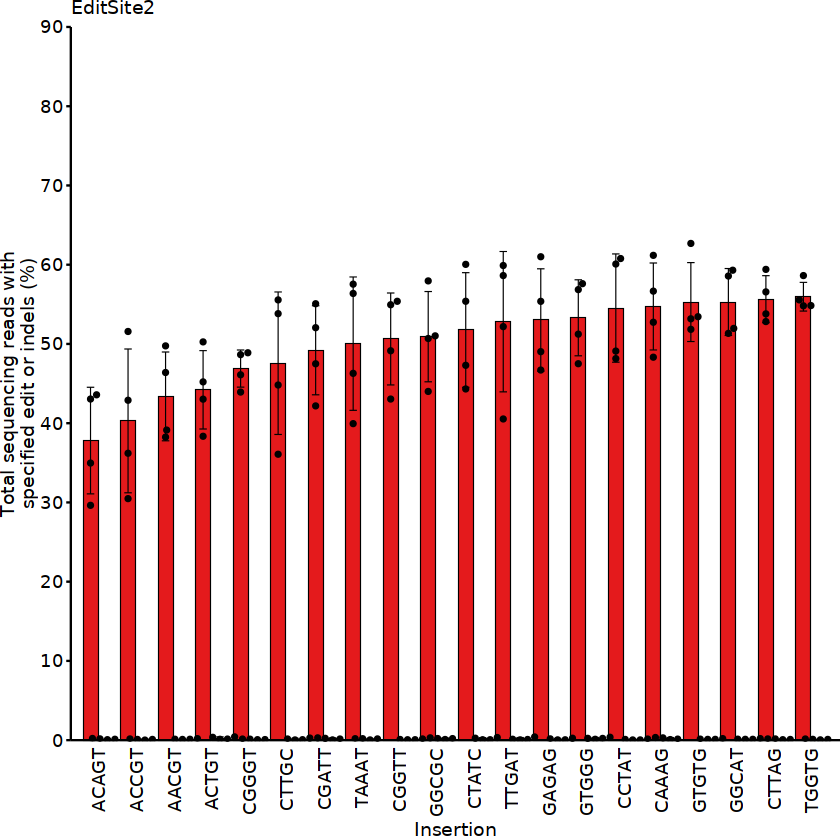

In [7]:
pdf("plots/EditSite2_top20BC.pdf", width = 2.65, height = 2.25, useDingbats = FALSE)
plot_top20_barcodes(summary_all, "EditSite2")
dev.off()

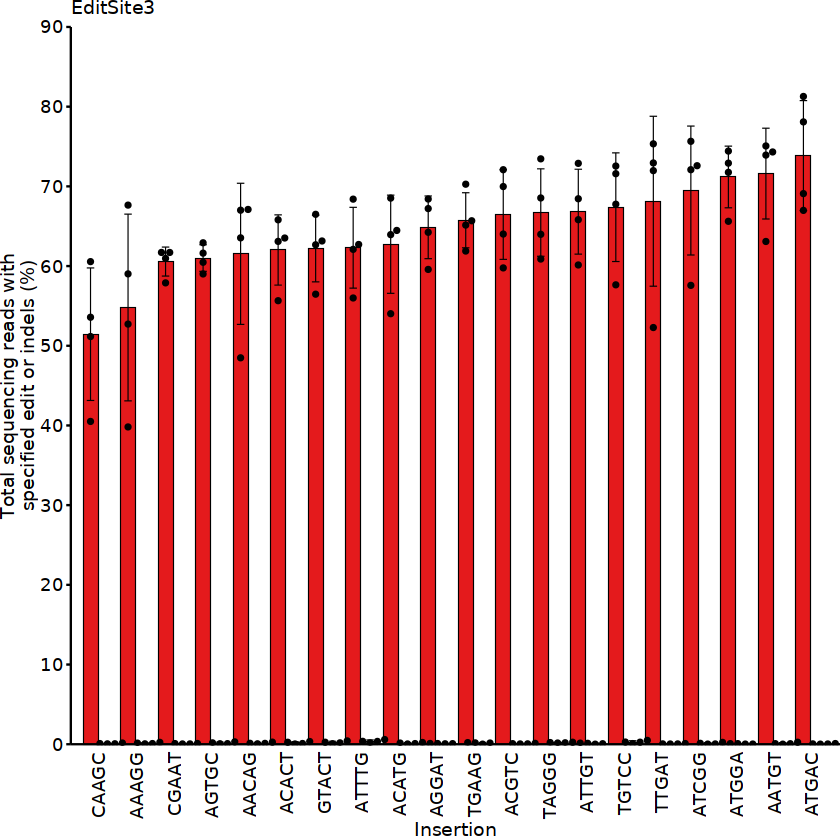

In [8]:
pdf("plots/EditSite3_top20BC.pdf", width = 2.65, height = 2.25, useDingbats = FALSE)
plot_top20_barcodes(summary_all, "EditSite3")
dev.off()